<a href="https://colab.research.google.com/github/Poorya0071/Image-classification/blob/main/plant_pathology_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Classification

In this notebook, we are going to classify a given image into a different diseased category or a healthy leaf. The data in this notebook is a combination of a CSV dataset table and a folder including the images. The important point in this project is how to process data from the data frame.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

In [3]:
# directory of the image folder
image_dir = '/content/drive/MyDrive/Colab Notebooks/plant-pathology-2020-fgvc7/images'

In [11]:
# read the SCV data set.
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/plant-pathology-2020-fgvc7/train.csv')
data.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [12]:
# add a column to add .jpg to the image ID to generate the image names match to the image folder
data['image'] = data['image_id'] + ".jpg"
data.head()

,image_id,healthy,multiple_diseases,rust,scab,image
0,Train_0,0,0,0,1,Train_0.jpg
1,Train_1,0,1,0,0,Train_1.jpg
2,Train_2,1,0,0,0,Train_2.jpg
3,Train_3,0,0,1,0,Train_3.jpg
4,Train_4,1,0,0,0,Train_4.jpg


In [13]:
# drop the image_id column.
data.drop(['image_id'], axis = 1, inplace= True)
data.head()

,healthy,multiple_diseases,rust,scab,image
0,0,0,0,1,Train_0.jpg
1,0,1,0,0,Train_1.jpg
2,1,0,0,0,Train_2.jpg
3,0,0,1,0,Train_3.jpg
4,1,0,0,0,Train_4.jpg


In [14]:
# check whether the data is balance or not.
print(f"helthy : {data['healthy'].sum()}")
print(f"multiple_diseases : {data['multiple_diseases'].sum()}")
print(f"rust : {data['rust'].sum()}")
print(f"scab : {data['scab'].sum()}")


helthy : 516
multiple_diseases : 91
rust : 622
scab : 592


## Data imbalance

There is a data imbalance for labels. We need to use oversampling approach to deal with the data imbalance issue.

In [23]:
# let's define X and y for feature and labels.
X = data[['image']]
y = data[['healthy', 'multiple_diseases', 'rust', 'scab']]

Use Imblearn for oversampling

In [24]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y.values)

In [34]:
# checj new feature after oversampling.
X_ros_data = pd.DataFrame(X_ros, columns = ['image'])
X_ros_data

,image
0,Train_0.jpg
1,Train_1.jpg
2,Train_2.jpg
3,Train_3.jpg
4,Train_4.jpg
...,...
2483,Train_520.jpg
2484,Train_859.jpg
2485,Train_168.jpg
2486,Train_661.jpg


Create the dataframe of labels.




In [30]:
y_ros_data = pd.DataFrame(y_ros, columns = ['healthy', 'multiple_diseases', 'rust', 'scab'])
y_ros_data

,healthy,multiple_diseases,rust,scab
0,0,0,0,1
1,0,1,0,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
2483,0,0,0,1
2484,0,0,0,1
2485,0,0,0,1
2486,0,0,0,1


Check the labels after oversampling.

In [31]:
print(f"features after oversampling")
print(f"helthy : {y_ros_data['healthy'].sum()}")
print(f"multiple_diseases : {y_ros_data['multiple_diseases'].sum()}")
print(f"rust : {y_ros_data['rust'].sum()}")
print(f"scab : {y_ros_data['scab'].sum()}")

features after oversampling
helthy : 622
multiple_diseases : 622
rust : 622
scab : 622


that seems good as we solved the oversampling issue.

Now let's combine X and y columns after oversampling into one data frame and shuffle the whole data set.

In [36]:
data_ros = pd.concat([X_ros_data, y_ros_data], axis = 1)
data_ros.head()

,image,healthy,multiple_diseases,rust,scab
0,Train_0.jpg,0,0,0,1
1,Train_1.jpg,0,1,0,0
2,Train_2.jpg,1,0,0,0
3,Train_3.jpg,0,0,1,0
4,Train_4.jpg,1,0,0,0


In [37]:
data_ros.describe()

,healthy,multiple_diseases,rust,scab
count,2488.0000,2488.0000,2488.0000,2488.0000
mean,0.2500,0.2500,0.2500,0.2500
std,0.4331,0.4331,0.4331,0.4331
min,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0000,0.0000
50%,0.0000,0.0000,0.0000,0.0000
75%,0.2500,0.2500,0.2500,0.2500
max,1.0000,1.0000,1.0000,1.0000


In [38]:
# data shuffeling
shuffeled_df = data_ros.sample(frac=1, random_state=42).reset_index()
shuffeled_df.head()

,index,image,healthy,multiple_diseases,rust,scab
0,1027,Train_1027.jpg,0,0,0,1
1,1313,Train_1313.jpg,1,0,0,0
2,2093,Train_395.jpg,0,1,0,0
3,1971,Train_1046.jpg,0,1,0,0
4,1662,Train_1662.jpg,0,1,0,0


In [39]:
# drop the old indexes
shuffeled_df.drop('index', axis = 1, inplace = True)
shuffeled_df.head()

,image,healthy,multiple_diseases,rust,scab
0,Train_1027.jpg,0,0,0,1
1,Train_1313.jpg,1,0,0,0
2,Train_395.jpg,0,1,0,0
3,Train_1046.jpg,0,1,0,0
4,Train_1662.jpg,0,1,0,0


Next, we have to use an image data generator to read the data from the data frame and the image directory. To do this, we have to provide another column for the name of each class that belonged to each label.

In [42]:
labels = shuffeled_df[['healthy', 'multiple_diseases', 'rust', 'scab']]
label_names = labels[labels==1].stack().reset_index()['level_1']
label_names.index = shuffeled_df.index
shuffeled_df['label_names'] = label_names
shuffeled_df.tail(10)

,image,healthy,multiple_diseases,rust,scab,label_names
2478,Train_1482.jpg,1,0,0,0,healthy
2479,Train_330.jpg,1,0,0,0,healthy
2480,Train_1238.jpg,0,0,0,1,scab
2481,Train_466.jpg,1,0,0,0,healthy
2482,Train_1358.jpg,0,1,0,0,multiple_diseases
2483,Train_1638.jpg,0,0,0,1,scab
2484,Train_1095.jpg,0,0,0,1,scab
2485,Train_1130.jpg,0,0,0,1,scab
2486,Train_1294.jpg,0,0,0,1,scab
2487,Train_860.jpg,0,0,1,0,rust


## ImageDataGenerator

Let's use ImageDataGenerator for rescaling the data and data augmentation.

In [40]:
IDG = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255, rotation_range= 0.2, horizontal_flip= True,
                                                shear_range = 0.2, zoom_range = 0.2, validation_split = 0.2) # validation_split solits the data to 
                                                                                                              # train and valid.

In [43]:
# let's define train and valid datasets.
train_data = IDG.flow_from_dataframe(dataframe=shuffeled_df,directory= image_dir,
                                                    x_col="image",
                                                    y_col="label_names",
                                                    target_size=(256, 256),
                                                    class_mode='categorical',
                                                    batch_size=32,
                                                    subset='training',
                                                    shuffle=True,
                                                    seed=42)

val_data_multi = IDG.flow_from_dataframe(dataframe=shuffeled_df,
                                                    directory=image_dir,
                                                    x_col="image",
                                                    y_col="label_names",
                                                    target_size=(256, 256),
                                                    class_mode='categorical',
                                                    batch_size=32,
                                                    subset='validation',
                                                    shuffle=True,
                                                    seed=42)

Found 1991 validated image filenames belonging to 4 classes.
Found 497 validated image filenames belonging to 4 classes.


## Deep Learning Models

Now, the data is ready for deep learning models.

### Model_1 : A simple CNN2D model.
Let's use a simple Convolutional network for the first model.

In [48]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_1 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(256, 256, 3)), # same input shape as our images
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(4, activation='softmax')
])

model_1.summary()

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=int(0.1 * len(train_data)),
                        validation_data=val_data_multi,
                        validation_steps=int(0.1 *len(val_data_multi)))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 254, 254, 10)      280       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 127, 127, 10)     0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 125, 125, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 62, 62, 10)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 38440)             0         
                                                                 
 dense_4 (Dense)             (None, 4)                

## Model_2 : Transfer Learning
Let's use tf hub and upload efficientnetB0.

In [22]:
import tensorflow_hub as hub
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"


In [29]:

feature_extract_layer = hub.KerasLayer(efficientnet_url, trainable = False, 
                                       name='feature_extraction_layer',
                                           input_shape = (256,256,3),
                                       )
# adding the layer for 100 sports as a output
model_2 = tf.keras.Sequential([
    feature_extract_layer,
    tf.keras.layers.Dense(4, activation= 'softmax', name='output_layer') # activiation for multiclass classification is softmax
])
# compile the model
model_2.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)
# fit the model
model_2_history = model_2.fit(train_data,
                                  epochs=20,
                                  steps_per_epoch=len(train_data),
                                  validation_data=val_data_multi,
                                  validation_steps=len(val_data_multi)
                                 )

Epoch 1/20
63/63 [==============================] - 750s 12s/step - loss: 1.1566 - accuracy: 0.5088 - val_loss: 0.9810 - val_accuracy: 0.6217
Epoch 2/20
63/63 [==============================] - 114s 2s/step - loss: 0.8731 - accuracy: 0.6826 - val_loss: 0.8211 - val_accuracy: 0.6982
Epoch 3/20
63/63 [==============================] - 110s 2s/step - loss: 0.7573 - accuracy: 0.7423 - val_loss: 0.7180 - val_accuracy: 0.7626
Epoch 4/20
63/63 [==============================] - 113s 2s/step - loss: 0.6770 - accuracy: 0.7810 - val_loss: 0.7036 - val_accuracy: 0.7465
Epoch 5/20
63/63 [==============================] - 109s 2s/step - loss: 0.6468 - accuracy: 0.7865 - val_loss: 0.6563 - val_accuracy: 0.7545
Epoch 6/20
63/63 [==============================] - 110s 2s/step - loss: 0.6084 - accuracy: 0.7931 - val_loss: 0.6423 - val_accuracy: 0.7726
Epoch 7/20
63/63 [==============================] - 113s 2s/step - loss: 0.5841 - accuracy: 0.8076 - val_loss: 0.5882 - val_accuracy: 0.7827
Epoch 8/20
6

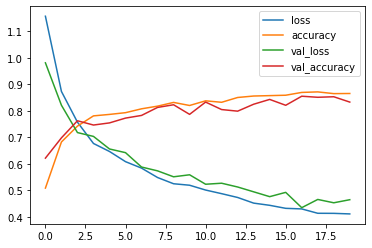

In [30]:
pd.DataFrame(model_2_history.history).plot()

## Comarison

The accuracy of model_2 is around 85% which means that this transfer learning model works well and much better than a simple CNN2d model which works awful on the validation dataset.